# Diwali Sales Analysis



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading csv file
df = pd.read_csv('/content/Diwali Sales Data.csv', encoding='latin1')

In [3]:
# shape of the dataframe
df.shape

(11251, 15)

In [4]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [6]:
# general info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# dropping empty columns
df.drop(['Status', 'unnamed1'], axis=1, inplace = True)

In [8]:
# checking null values in each column
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# dropping null values in the dataframe
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
# changing data type of 'Amount' to int
df['Amount'] = df['Amount'].astype('int')

In [12]:
df['Amount'].dtype

dtype('int64')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
# Descriptive statistics for all numeric data-type columns
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


#Exploratory data analysis

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

##Gender

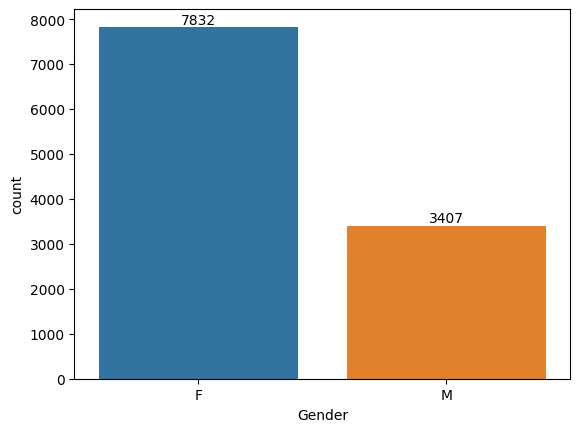

In [17]:
# Count plot for orders by 'Gender'
ax = sns.countplot(data = df, x = 'Gender', hue = 'Gender')

for bars in ax.containers:
  ax.bar_label(bars)

In [18]:
# aggregating sales by 'Gender'
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

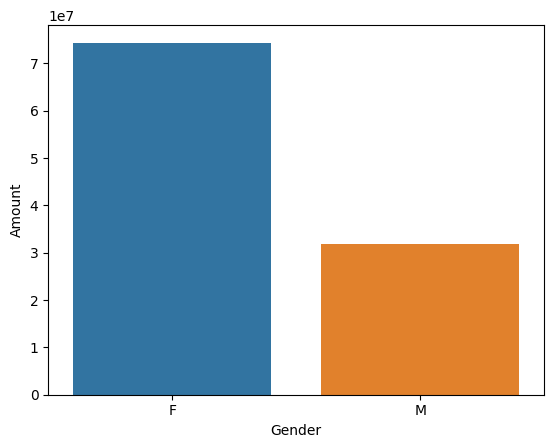

In [19]:
# Bar plot for sales by 'Gender'
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(data = sales_gen, x = 'Gender', y = 'Amount', hue = 'Gender')

##### From the above findings it can be clearly observed that "Women" place more orders than men and also their purchasing power is greater than men

# Age

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

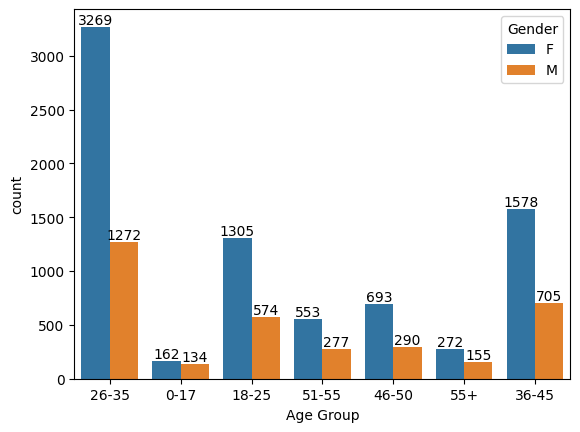

In [21]:
# Count plot for orders by 'Gender' and 'Age group'
ax = sns.countplot(data = df, x = "Age Group", hue = "Gender")

for bars in ax.containers:
  ax.bar_label(bars)

In [22]:
# aggregating sales by 'Age group'
df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

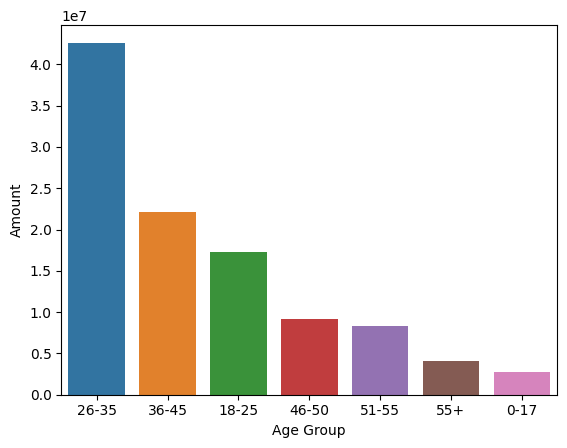

In [23]:
# Bar plot for sales by 'Age group'
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(data = sales_age, x = 'Age Group', y = 'Amount', hue = 'Age Group')

### From the above observations we can clearly see that Age Group (26-35) that does the most spending.

# State

In [24]:
# aggregating sales by 'State'
df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


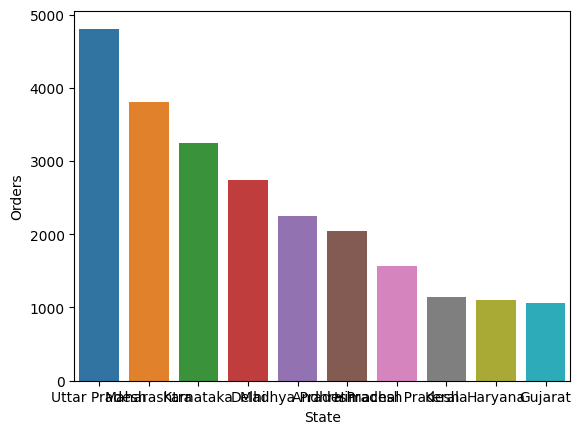

In [25]:
# Bar plot for orders by 'State'
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.barplot(data = sales_state, x = 'State', y = 'Orders', hue = 'State')
sns.set(rc={'figure.figsize':(15,5)})

<Axes: xlabel='State', ylabel='Amount'>

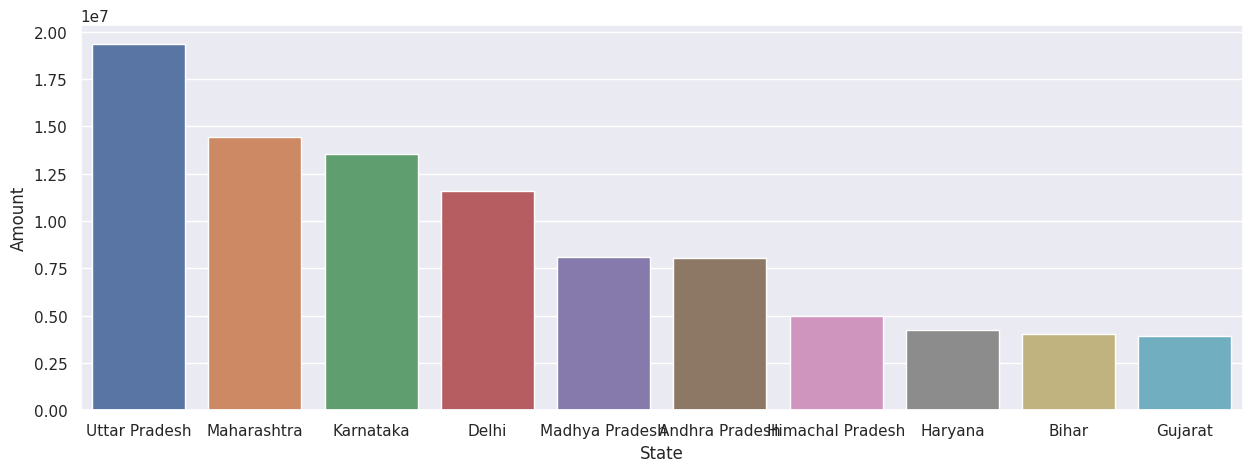

In [26]:
# Bar plot for sales by 'State'
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (15,5)})
sns.barplot(data = sales_state, x = "State", y = "Amount", hue = "State")

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Marital Status

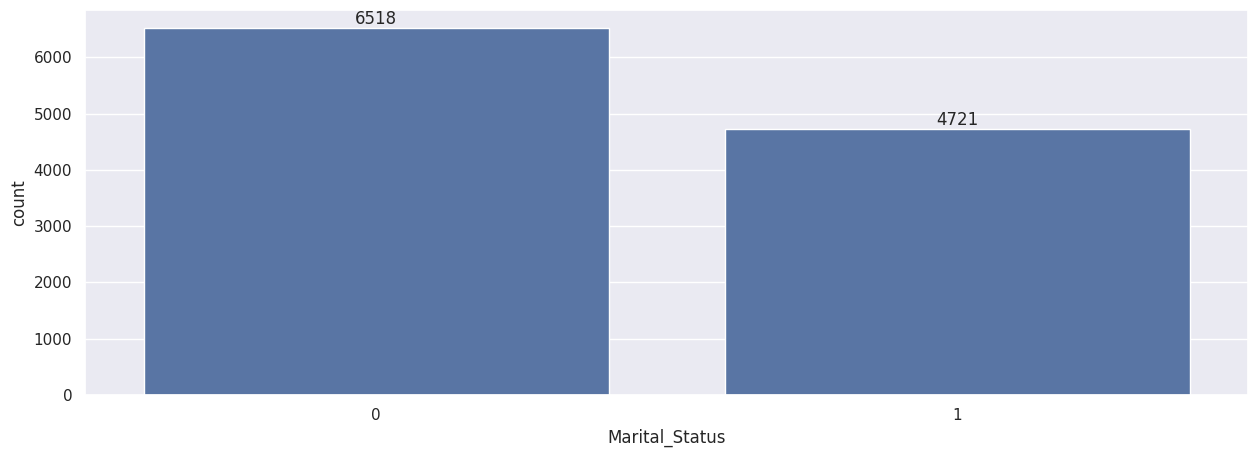

In [28]:
# Count plot for orders by 'Martial Status'
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

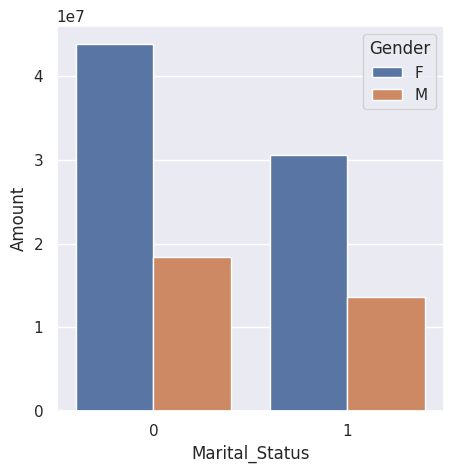

In [29]:
# Bar plot for sales by 'Marital status'
sales_state = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(data = sales_state, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

### From the above graphs, we can observe that most order are being placed by unmarried woman.

# Occupation

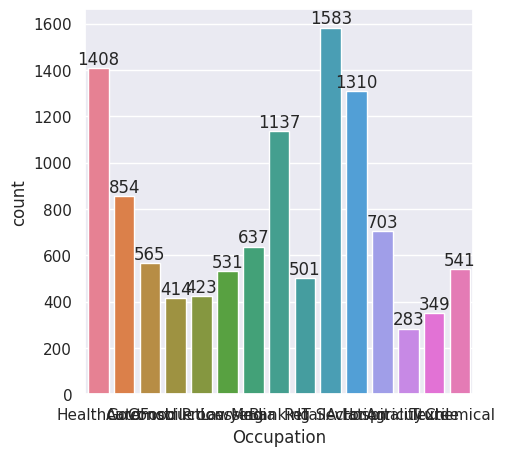

In [30]:
# Count plot for orders by 'Occupation'
ax = sns.countplot(data = df, x = "Occupation", hue = "Occupation")

sns.set(rc = {'figure.figsize':(18,5)})

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

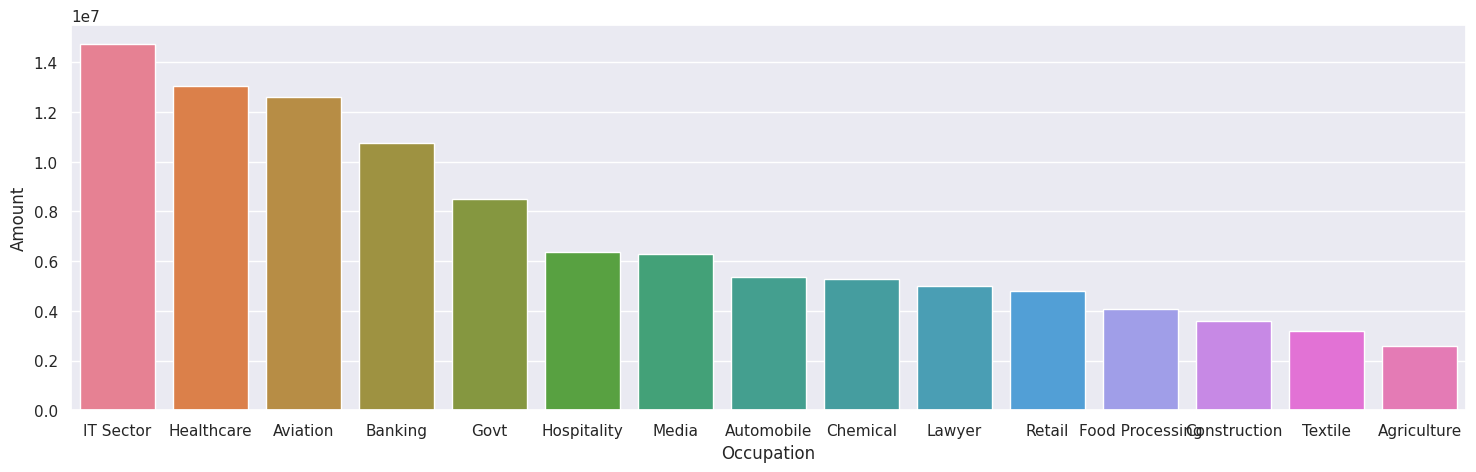

In [31]:
# Bar plot by sales by 'Occupation'
sales_data = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(data = sales_data, x = 'Occupation', y = 'Amount', hue = 'Occupation')

# Product Category

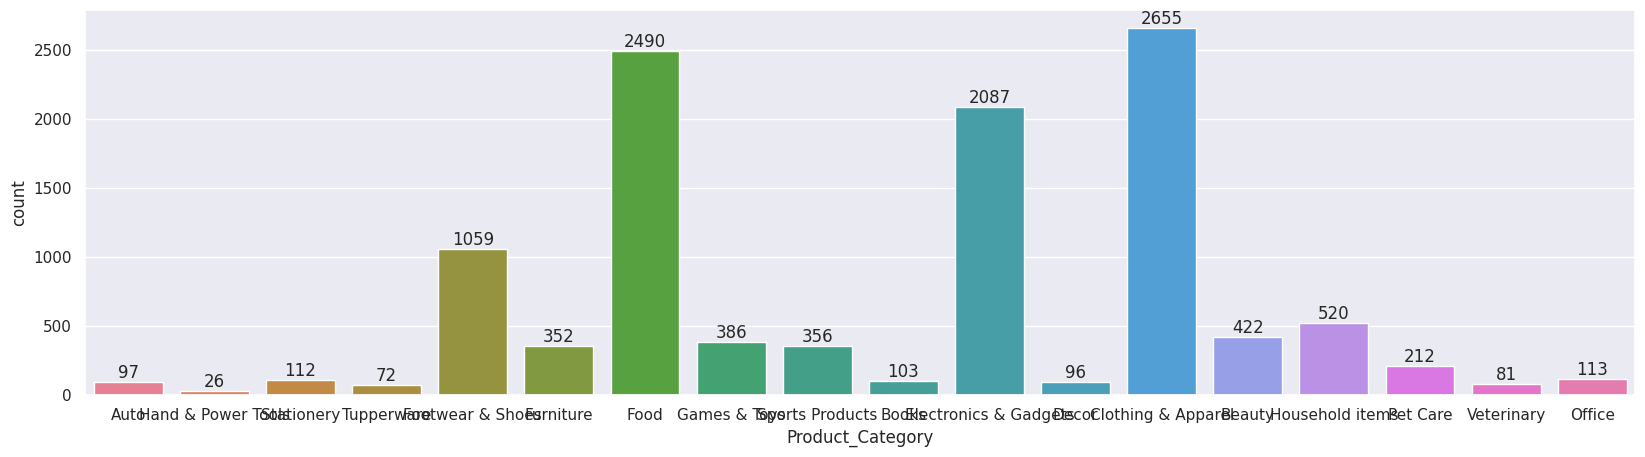

In [32]:
# Count plot for orders by 'Product Category'
sns.set(rc={'figure.figsize':(20,5)})

ax = sns.countplot(data = df, x = 'Product_Category', hue = "Product_Category")

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

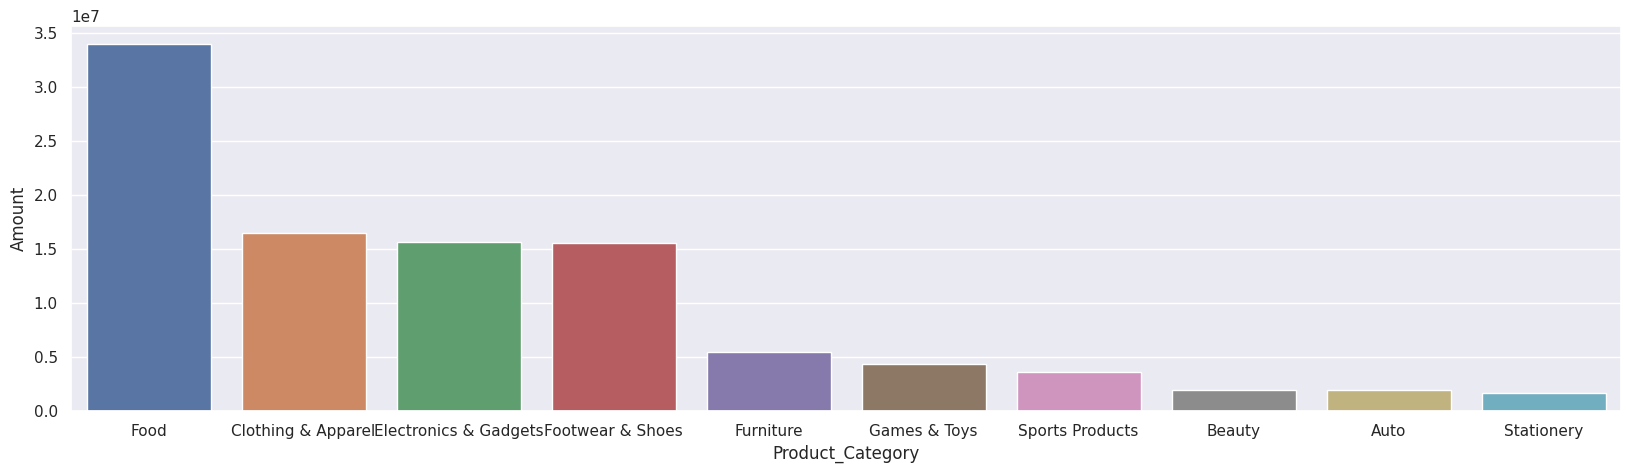

In [33]:
# Bar plot for sales by 'Product Category'
sales_data = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by="Amount", ascending = False).head(10)

sns.barplot(data = sales_data, x = 'Product_Category', y = 'Amount', hue = 'Product_Category')

<Axes: xlabel='Product_ID', ylabel='Amount'>

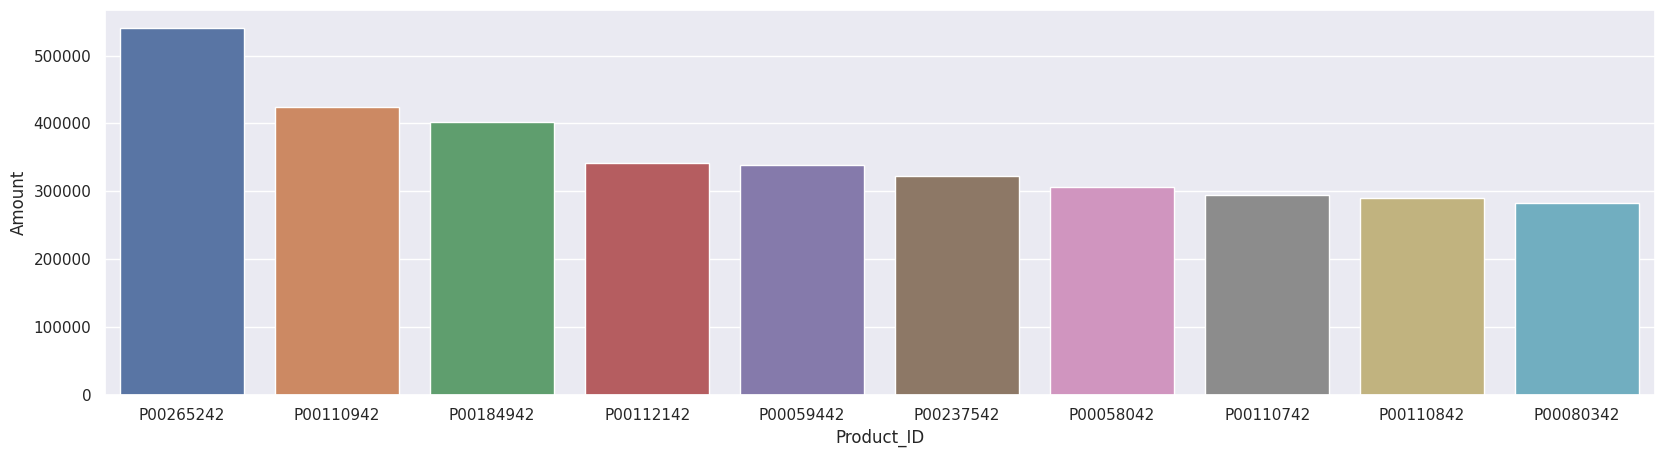

In [34]:
# Bar plot for sales by 'Product ID'
sales_data = df.groupby(['Product_ID'], as_index = False)['Amount'].sum().sort_values(by="Amount", ascending = False).head(10)

sns.barplot(data = sales_data, x = 'Product_ID', y = 'Amount', hue = 'Product_ID')

### From the above findings we can conclude that Clothing & apparel are most ordered segments but the Food category generates the most revenue from all segments.